## Requirements

This notebook requires Jupyter R kernel. Install it using following code in your R console:

```R
install.packages("IRkernel")
IRkernel::installspec()
```

In [2]:
# Setups
path = '/Users/yeganeh/Codes/SuggNet'
if (getwd() != path){
  setwd(path)  
}

# install.packages("sjPlot")
library(sjPlot)

In [3]:
# no nested with plv
grid = read.csv('data/classification_results/grid_tidy.csv',
                 colClasses=c('factor', 'numeric', 'factor', 'factor'))              

# nested with wpli with plv
ns = read.csv('data/classification_results/nested_grid_tidy.csv',
                   colClasses=c('factor', 'numeric', 'factor', 'factor', 'factor'))

# no segmentation
ns_noseg = read.csv('data/classification_results/grid_tidy_noseg4wpli_noplv.csv',
                   colClasses=c('factor', 'numeric', 'factor', 'factor', 'factor'))

ns <- subset(ns, method != 'plv')

In [21]:
result <- lm(accuracy ~ method * signal_type + band, ns)
summary(result)
# tab_model(result)


Call:
lm(formula = accuracy ~ method * signal_type + band, data = ns)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43801 -0.06054  0.00271  0.06146  0.26347 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    0.5775390  0.0074232  77.802  < 2e-16 ***
methodpower                   -0.0008669  0.0081317  -0.107 0.915111    
methodwpli                     0.0226210  0.0081317   2.782 0.005473 ** 
signal_typesource             -0.0196532  0.0081317  -2.417 0.015774 *  
bandbeta                      -0.0088508  0.0074232  -1.192 0.233326    
banddelta                     -0.0524093  0.0074232  -7.060 2.54e-12 ***
bandgamma                      0.0250403  0.0074232   3.373 0.000762 ***
bandtheta                     -0.0250437  0.0074232  -3.374 0.000761 ***
methodpower:signal_typesource  0.0460887  0.0114999   4.008 6.43e-05 ***
methodwpli:signal_typesource  -0.0895605  0.0114999  -7.788 1.27e-14 ***
---
Sig

In [9]:
anova_rs <- aov(accuracy ~ band * method * signal_type, ns)
tukey_result <- TukeyHSD(anova_rs)
tukey_result

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = accuracy ~ band * method * signal_type, data = ns)

$band
                    diff          lwr          upr     p adj
beta-alpha  -0.008850806 -0.026962513  0.009260900 0.6695487
delta-alpha -0.052409274 -0.070520981 -0.034297567 0.0000000
gamma-alpha  0.025040323  0.006928616  0.043152029 0.0015545
theta-alpha -0.025043683 -0.043155390 -0.006931976 0.0015515
delta-beta  -0.043558468 -0.061670174 -0.025446761 0.0000000
gamma-beta   0.033891129  0.015779422  0.052002836 0.0000036
theta-beta  -0.016192876 -0.034304583  0.001918830 0.1049354
gamma-delta  0.077449597  0.059337890  0.095561304 0.0000000
theta-delta  0.027365591  0.009253885  0.045477298 0.0003742
theta-gamma -0.050084005 -0.068195712 -0.031972299 0.0000000

$method
                         diff         lwr         upr    p adj
power-correlation  0.02217742  0.01012622  0.03422862 5.00e-05
wpli-correlation  -0.02215927 -0.03421047

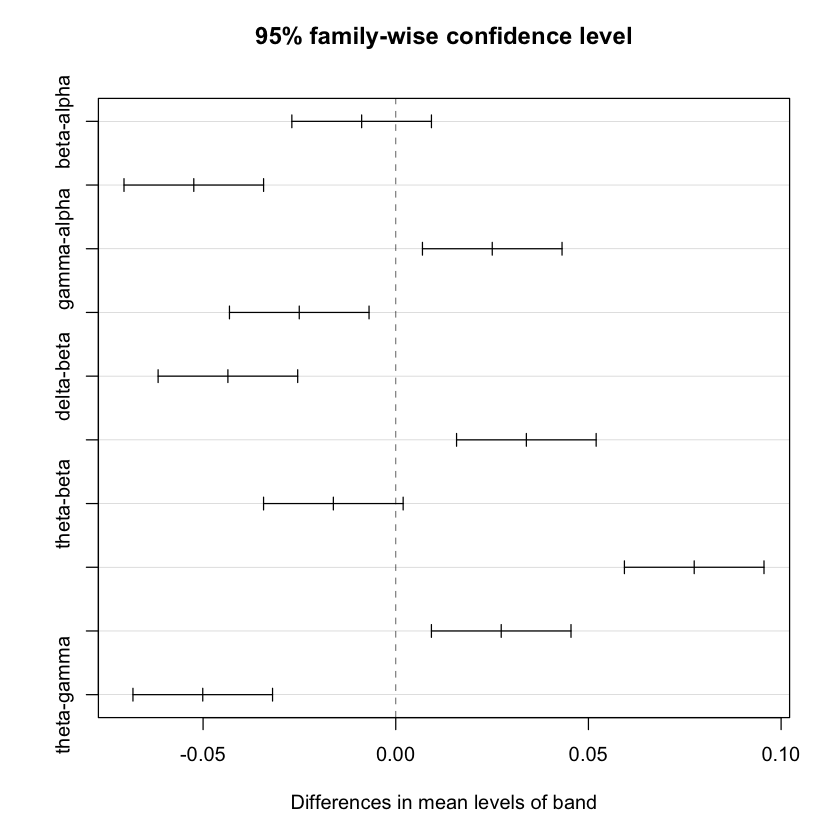

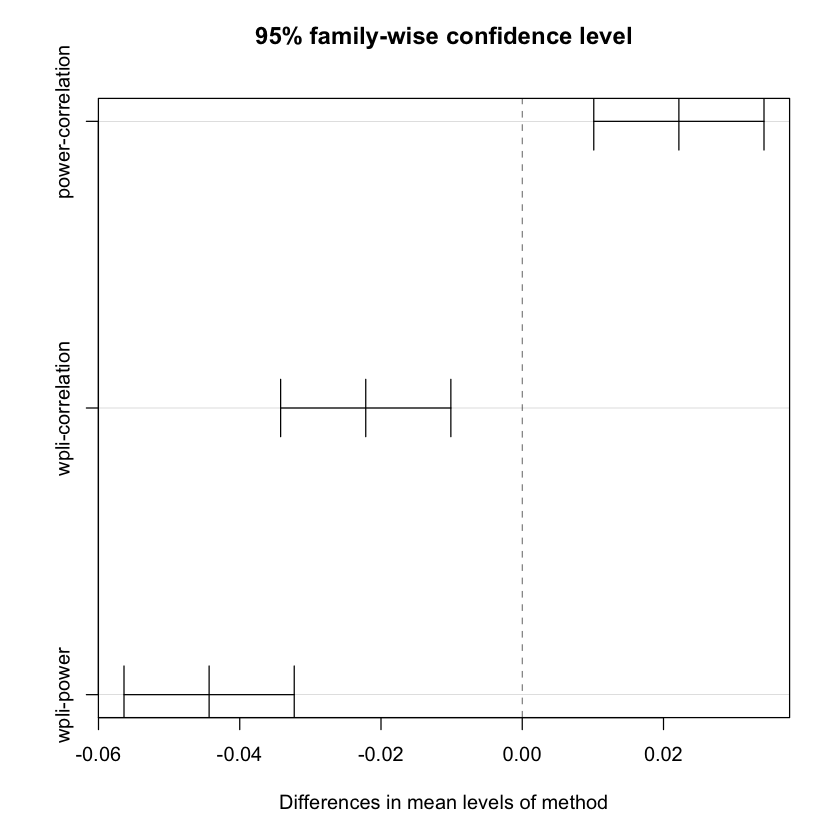

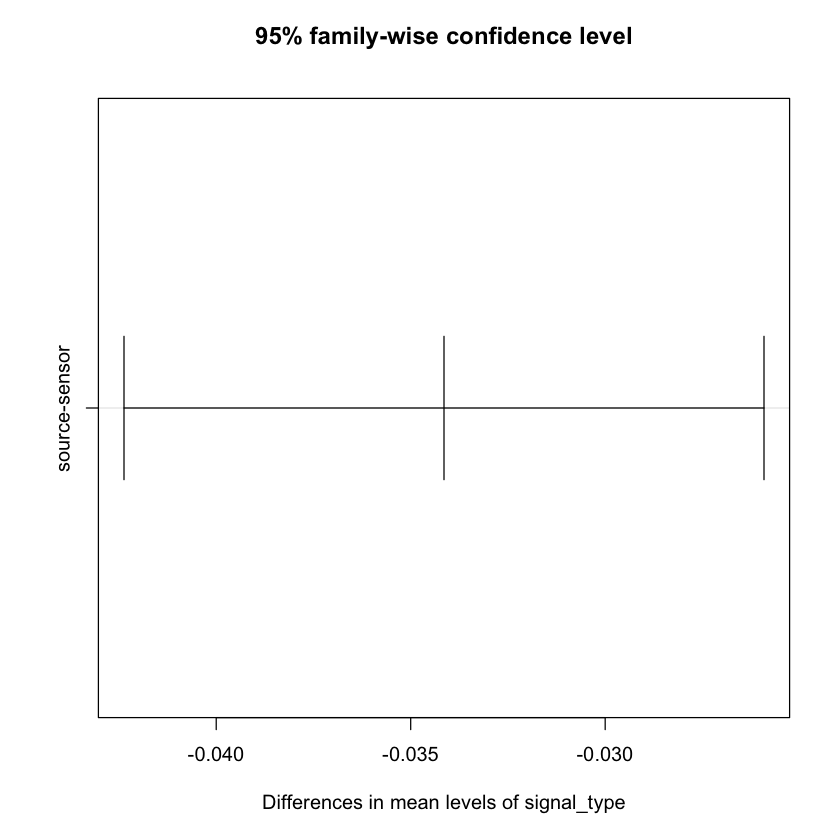

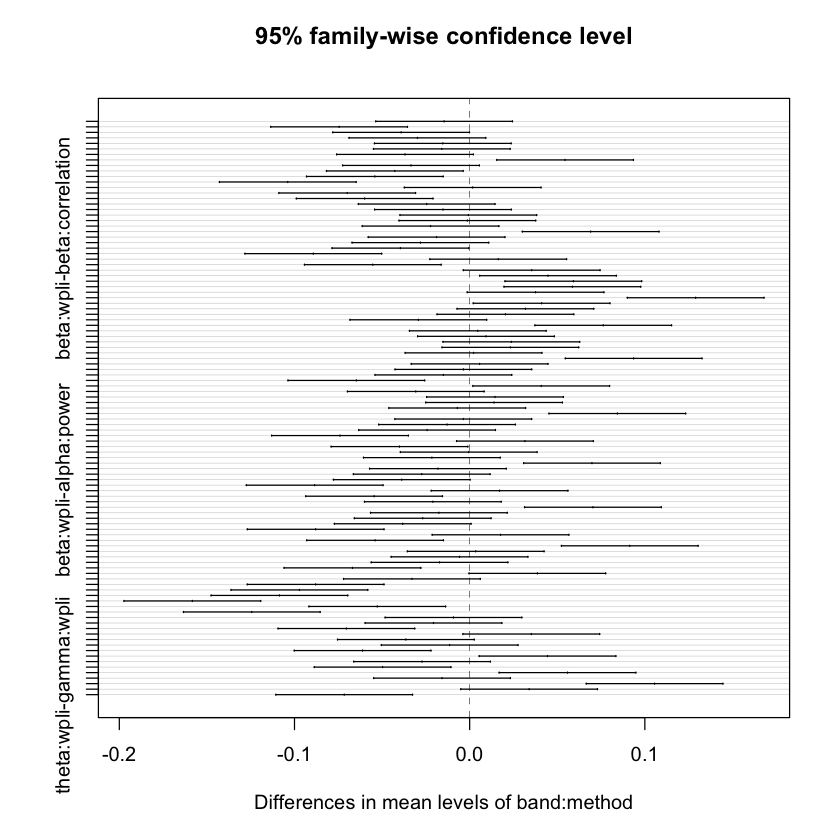

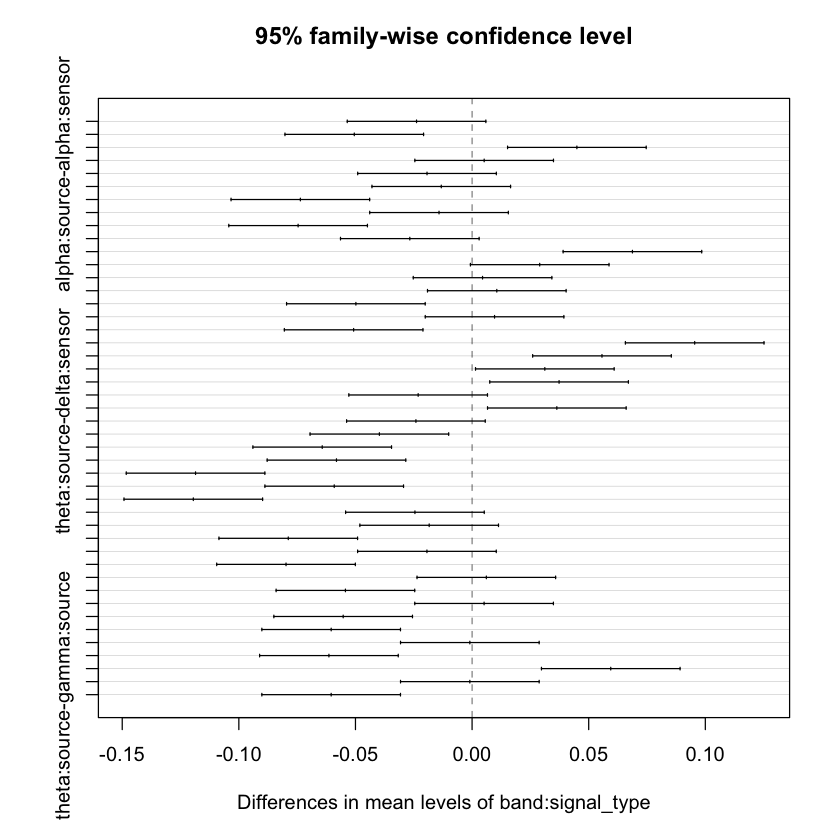

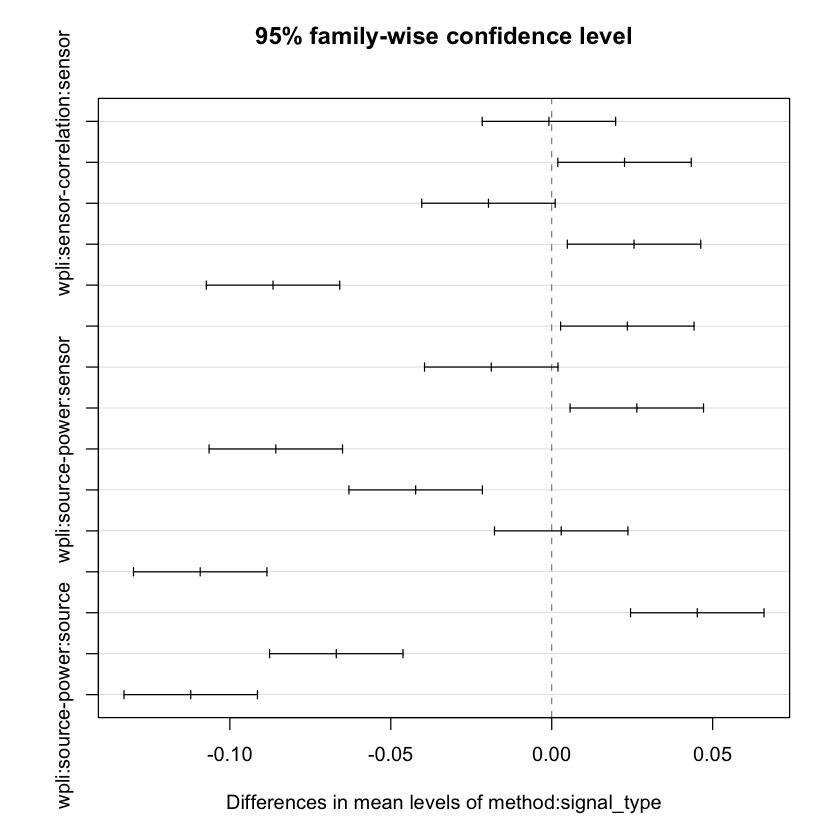

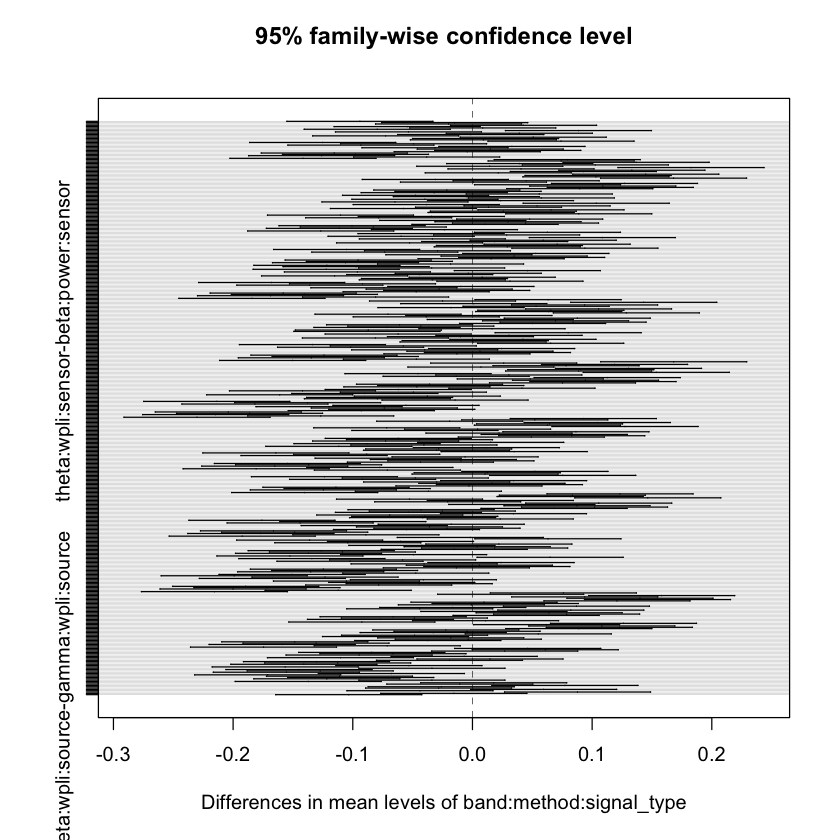

In [30]:
plot(tukey_result)